In [13]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
cars=pd.read_csv('car data.csv')
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
cars.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
cars.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


DEALING WITH MISSING VALUES

In [6]:
missingData=cars.isnull().sum()
missingData

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

OUTLIERS

In [7]:
continuousData=cars.select_dtypes(exclude='object')
continuousData

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


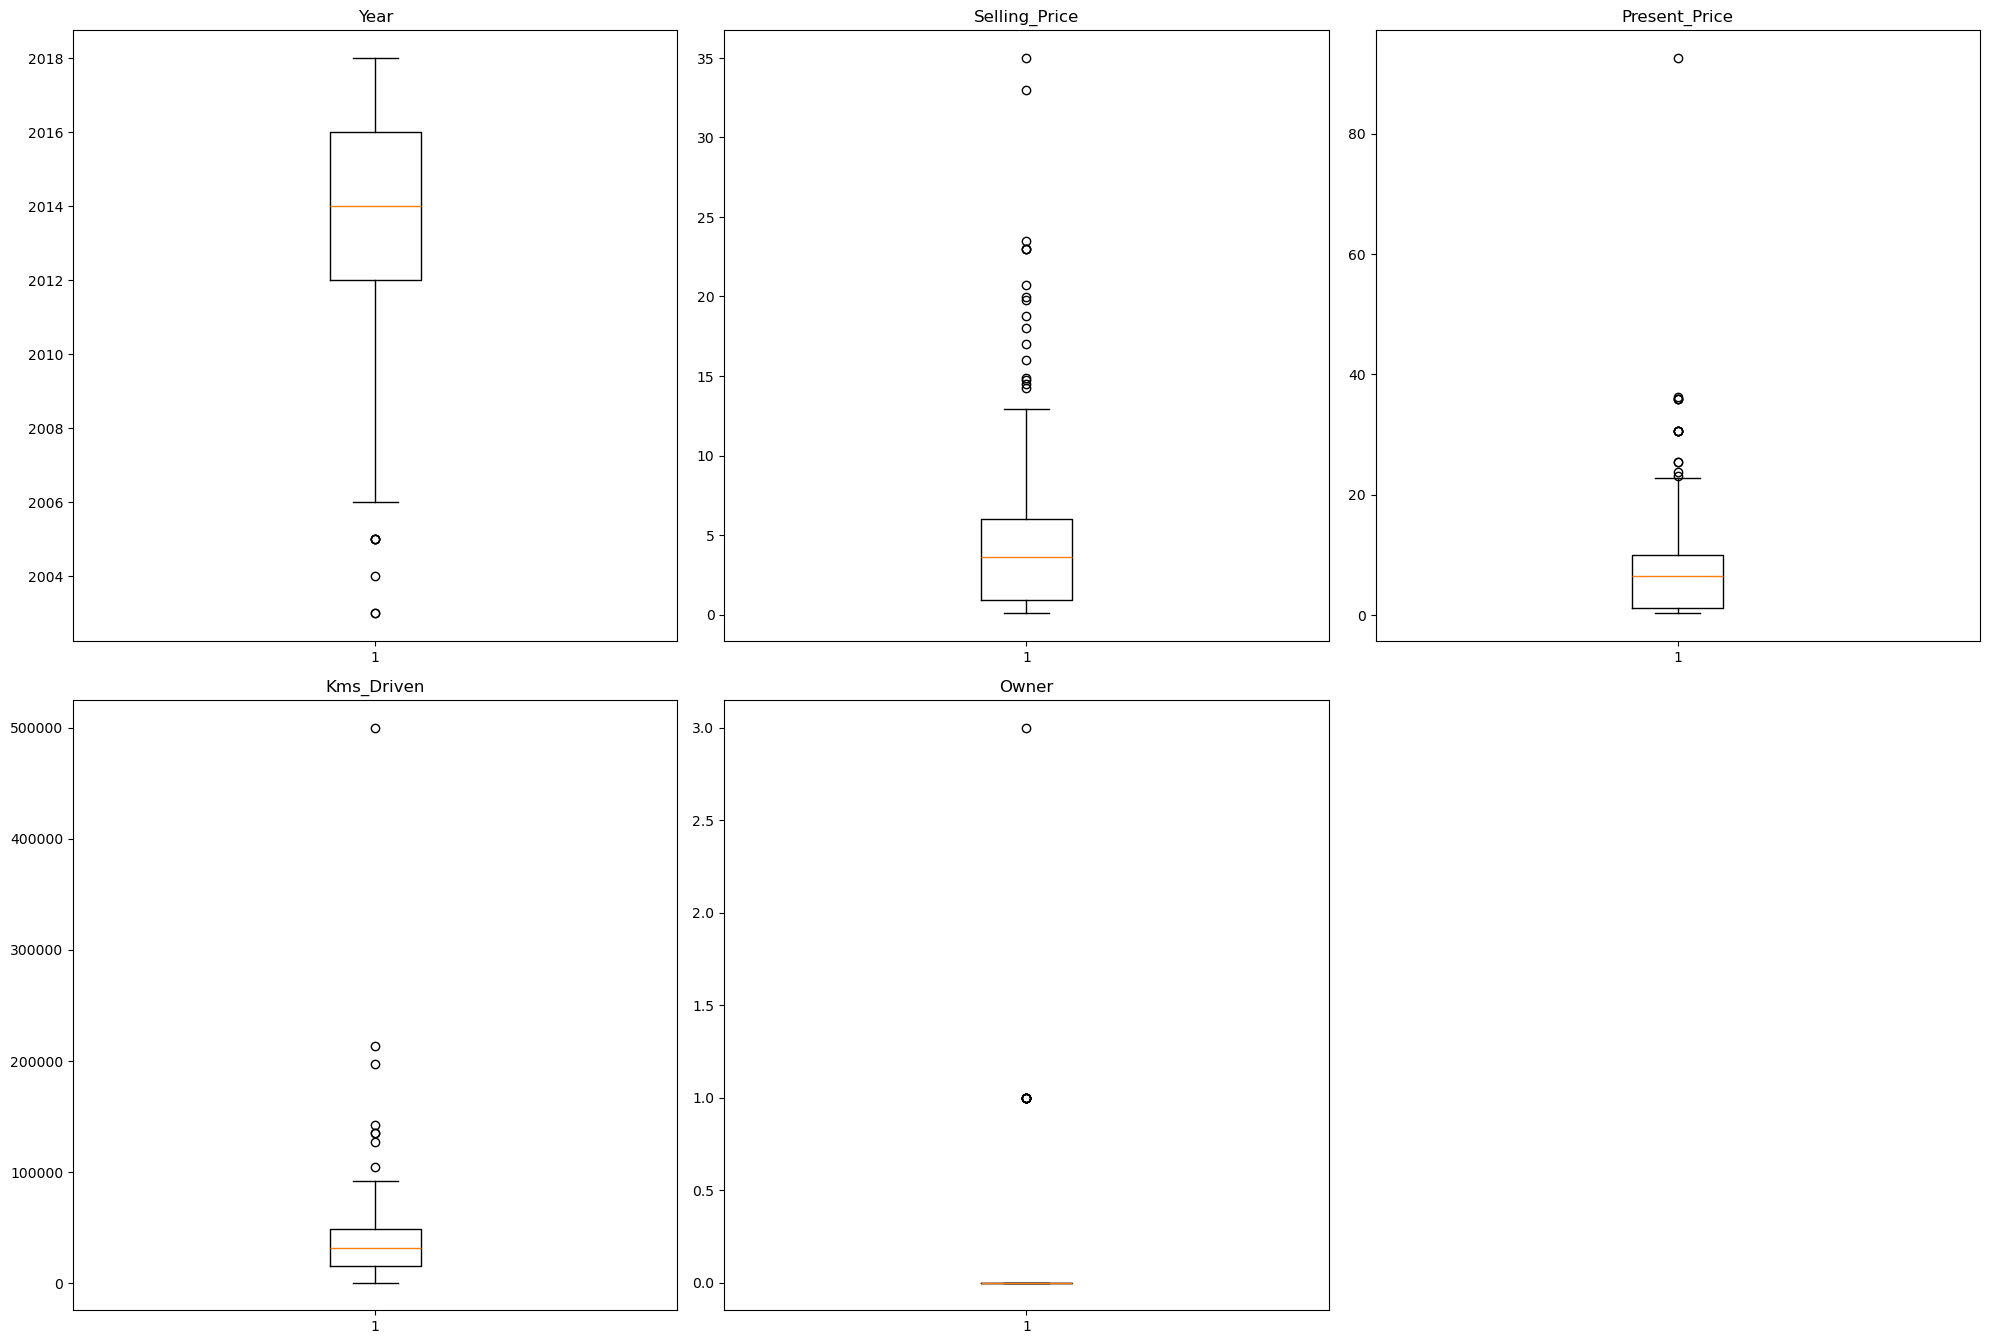

In [8]:
plt.figure(figsize=(20,20))
for i, col in enumerate(continuousData.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(cars[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [9]:
#using IQR
def removing_outliers(columns):
    for i in columns:
        lower_quantile=cars[i].quantile(.25)
        upper_quantile=cars[i].quantile(.75)

        IQR=upper_quantile-lower_quantile

        upper_boundary=upper_quantile+1.5*IQR
        lower_boundary=lower_quantile-1.5*IQR

        cars[i]=nm.where(cars[i]>upper_boundary,upper_boundary,cars[i])
        cars[i]=nm.where(cars[i]<lower_boundary,lower_boundary,cars[i])

In [10]:
removing_outliers(continuousData)

In [11]:
def boxplotting(continuousData):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(continuousData.columns):
        plt.subplot(3,3,i+1)
        plt.boxplot(cars[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

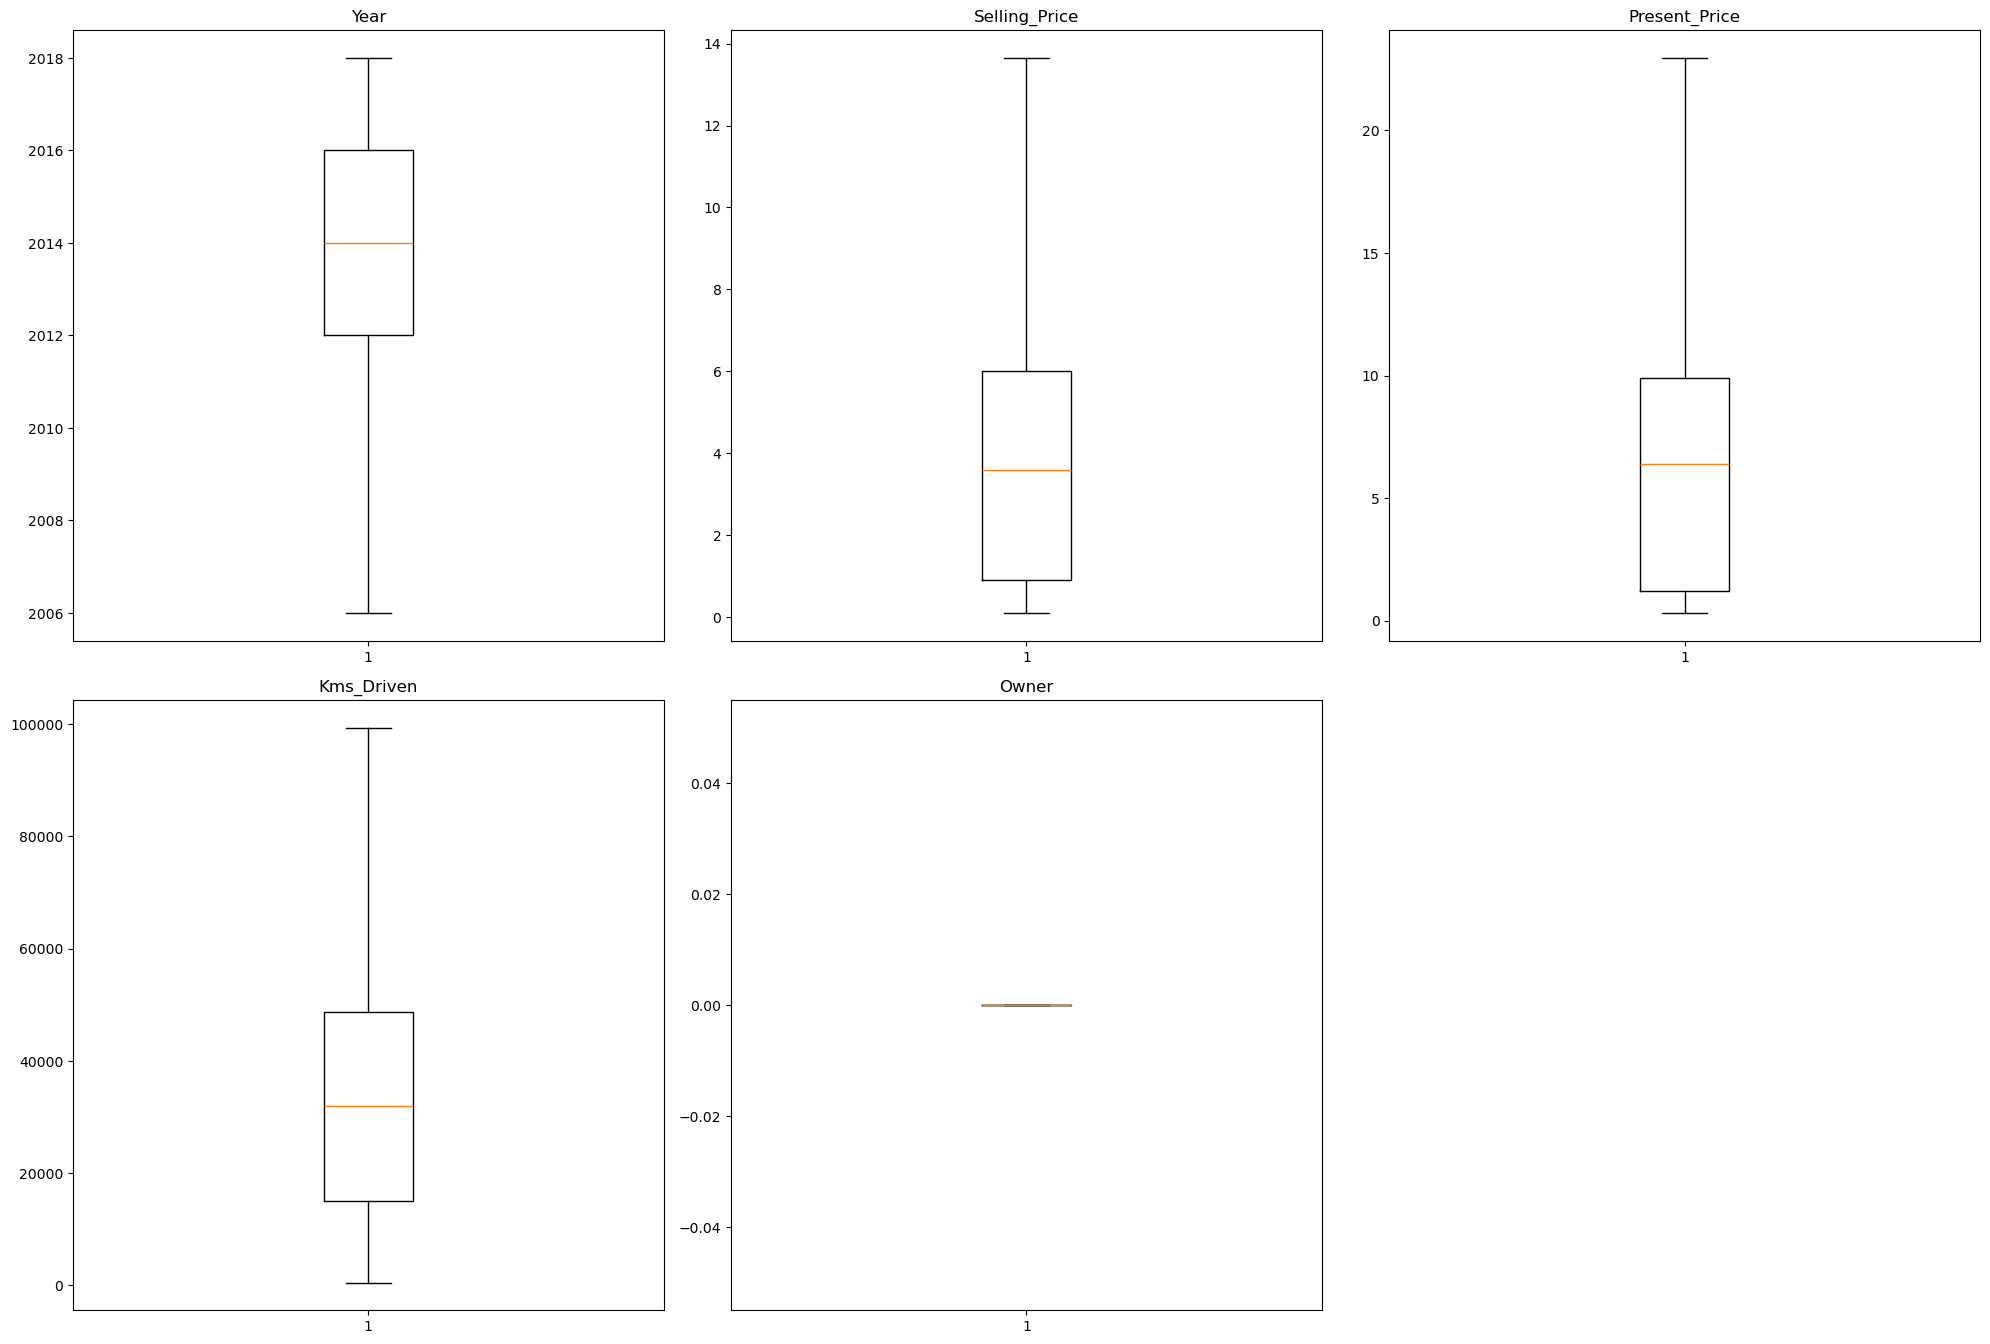

In [12]:
boxplotting(continuousData)

RELATIONSHIPS

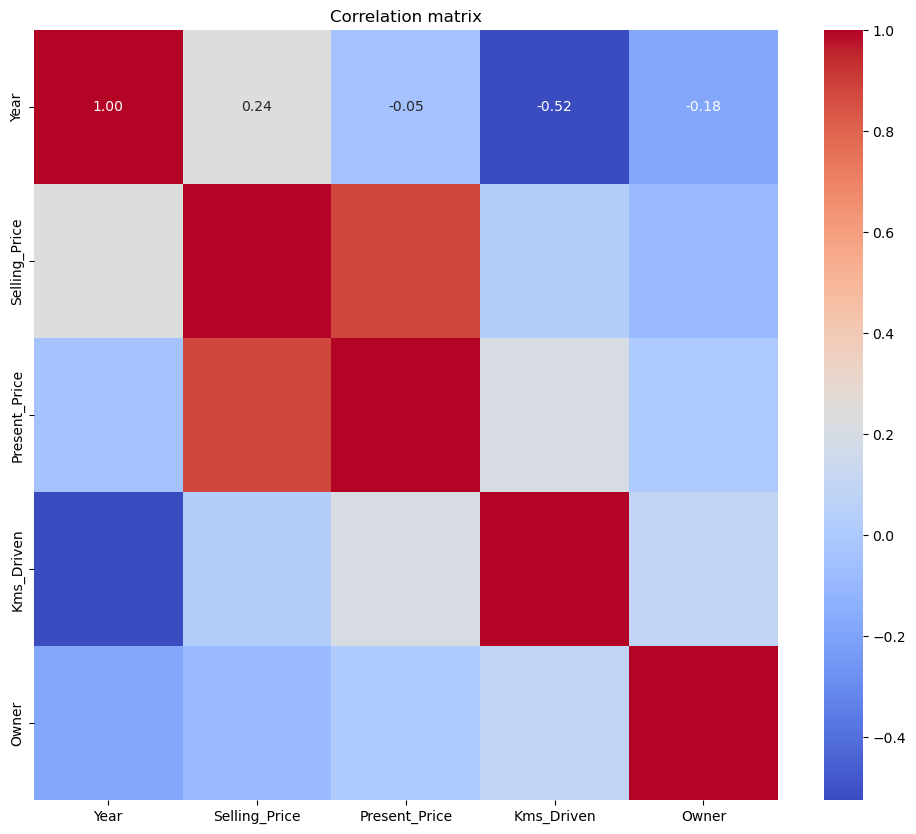

In [15]:
#CONTINUOUS TO CONTINUOUS
#Using a correlation matrix
corr_matrix=continuousData.corr()
plt.figure(figsize=(12,10))
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation matrix')
plt.show()

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

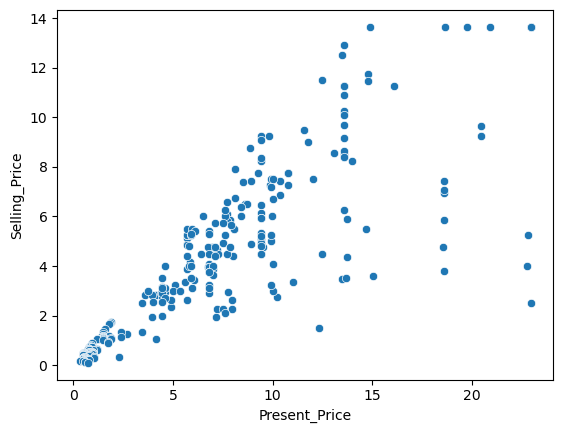

In [16]:
sb.scatterplot(cars,x='Present_Price',y='Selling_Price')

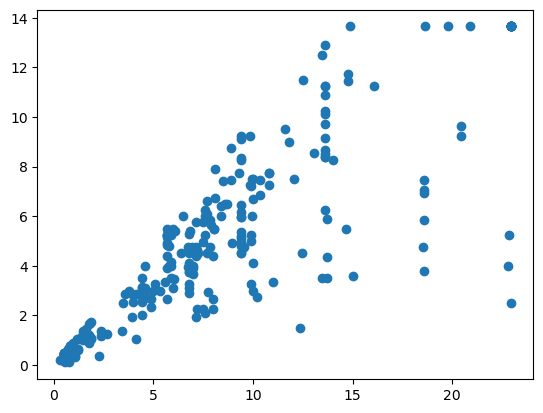

In [17]:
plt.scatter(x=cars['Present_Price'],y=cars['Selling_Price'])

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

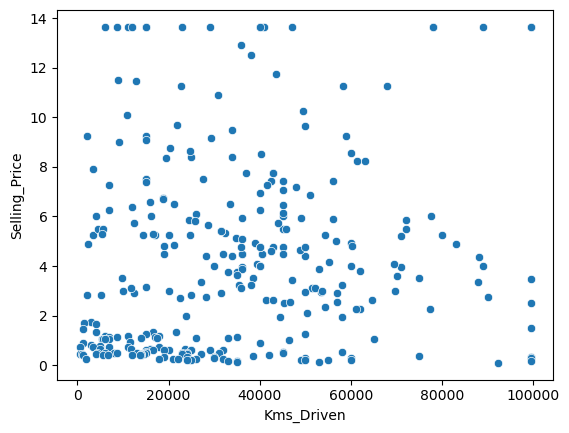

In [18]:
sb.scatterplot(cars,x='Kms_Driven',y='Selling_Price')

<Axes: xlabel='Year', ylabel='Selling_Price'>

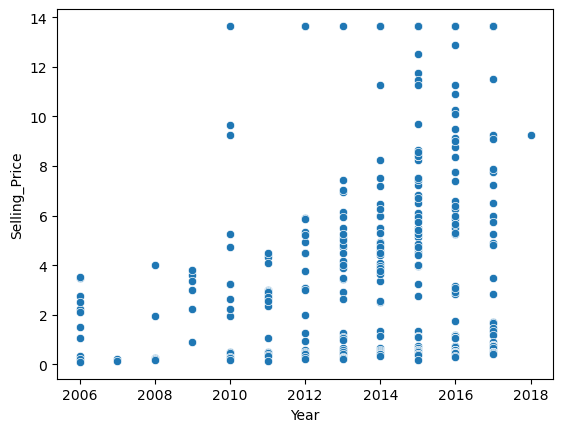

In [19]:
sb.scatterplot(cars,x='Year',y='Selling_Price')

<Axes: xlabel='Owner', ylabel='Selling_Price'>

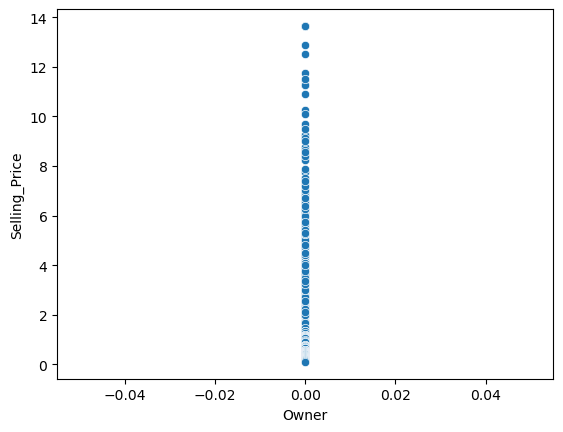

In [20]:
sb.scatterplot(cars,x='Owner',y='Selling_Price')

THE ONLY CONTINUOUS PREDICTOR IS PRESENT_PRICE

CONTINUOUS TO CATEGORICAL

In [23]:
from scipy.stats import f_oneway

In [24]:
def combined_boxplots(data,var1,var2):
    sb.boxplot(x=data[var1],y=data[var2])
    plt.xlabel(f"{var1}")
    plt.ylabel(f"{var2}")
    plt.title(f"Boxplot for {var1} vs {var2}")
    plt.show()

def AnovaTest(data, cont_var,cat_var):
    groupData=[group[cont_var].values for _, group in data.groupby(cat_var)]
    f_statistics, p_value=f_oneway(*groupData)
    if p_value>0.05:
        print(f"{cat_var} is not correlated with {cont_var}")
    elif p_value<0.05:
        print(f"{cat_var} is corrlated with {cont_var}")

In [25]:
categoricalData=cars.select_dtypes(include=["object"]).columns
categoricalData

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

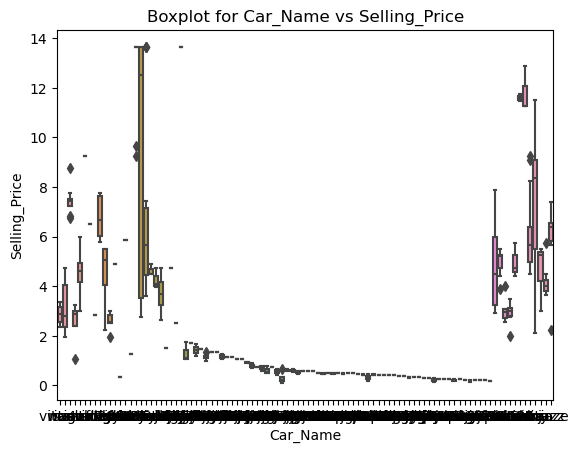

Car_Name is corrlated with Selling_Price


<Figure size 640x480 with 0 Axes>

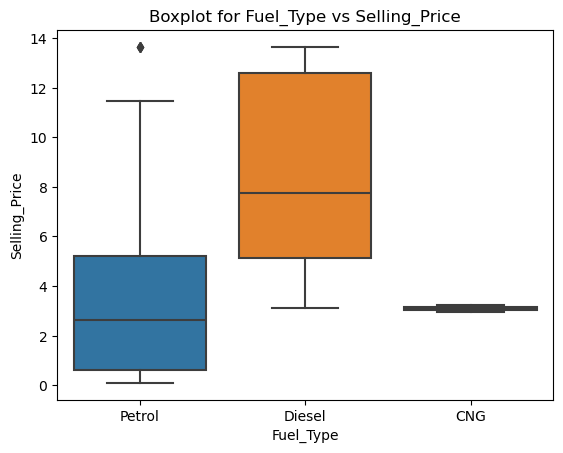

Fuel_Type is corrlated with Selling_Price


<Figure size 640x480 with 0 Axes>

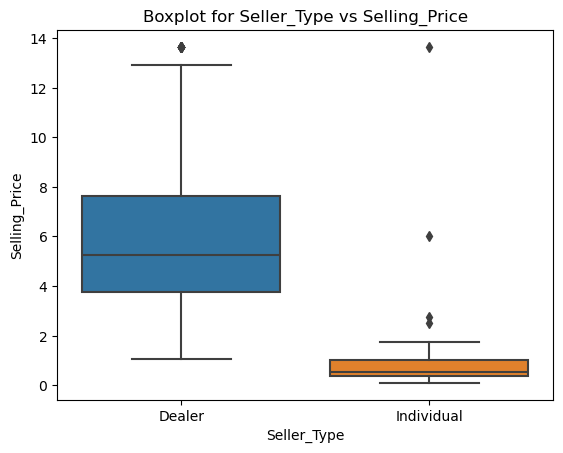

Seller_Type is corrlated with Selling_Price


<Figure size 640x480 with 0 Axes>

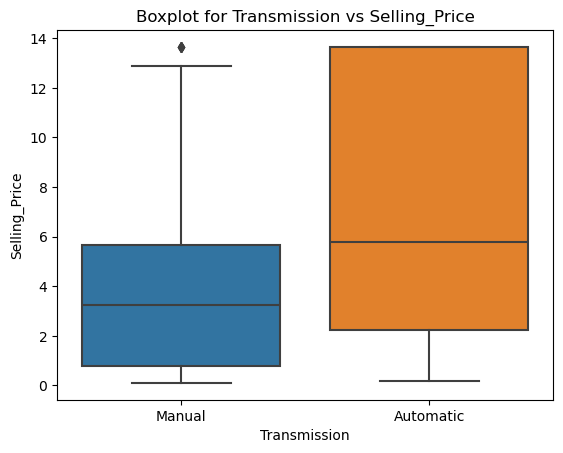

Transmission is corrlated with Selling_Price


<Figure size 640x480 with 0 Axes>

In [26]:
for i in categoricalData:
    combined_boxplots(cars, i , "Selling_Price")
    AnovaTest(cars,"Selling_Price",i)
    plt.tight_layout()
    plt.show()

'Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission' are correlated with selling price.

MODELS PREDICTIONS AND TESTING

In [27]:
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [28]:
predictors=cars[['Present_Price','Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']]
predictors.head()

,Present_Price,Car_Name,Fuel_Type,Seller_Type,Transmission
0,5.59,ritz,Petrol,Dealer,Manual
1,9.54,sx4,Diesel,Dealer,Manual
2,9.85,ciaz,Petrol,Dealer,Manual
3,4.15,wagon r,Petrol,Dealer,Manual
4,6.87,swift,Diesel,Dealer,Manual


CONVERING CATEGORICAL DATA TO CONTINUOUS DATA

In [31]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
label_encoder=LabelEncoder()
predictors["Car_Name"]=label_encoder.fit_transform(predictors["Car_Name"])
predictors["Fuel_Type"]=label_encoder.fit_transform(predictors["Fuel_Type"])
predictors["Seller_Type"]=label_encoder.fit_transform(predictors["Seller_Type"])
predictors["Transmission"]=label_encoder.fit_transform(predictors["Transmission"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4232\150910879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors["Car_Name"]=label_encoder.fit_transform(predictors["Car_Name"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4232\150910879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors["Fuel_Type"]=label_encoder.fit_transform(predictors["Fuel_Type"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4232\150910879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl